## Descriptive Statistics

In [3]:
import pandas as pd
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", index_col=False)

In [4]:
news_df.describe()
# news_df.shape

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [5]:
# we need to remove the unnamed column
news_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#now we can do describe again
news_df.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


## we cann see that the dataset ..

In [7]:
#checkk for null value per column
news_df.isnull().sum()
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


#### it can be seen that there are no missing /null values in any of the columns

## Analyzing headline lengths

In [8]:
#convert headline to string since it is an object type
news_df['headline'] = news_df['headline'].convert_dtypes(str)
news_df['headline_length'] = news_df['headline'].apply(len)
news_df.describe()

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


### Analysis of the headline lengths shows that:
    #### The shortest headline has 3 words/characters in it.
    #### The longest headline has 512 words/characters in it.
    #### On average a headline has 40.7 words/characters in it.
    #### The 25th percentile has 47 words/characters in it.
    #### The 75th percentile has 87 words/characters in it.

## Analyzing Number of Articles per Publisher

In [9]:
publisher_grouping = news_df.groupby('publisher').count().sort_values(by='headline' , ascending=False)
publisher_grouping[['headline']].head(50)


,headline
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


## Analyzing Publication Dates

[Text(0.5, 0, 'Hour of Day'), Text(0, 0.5, 'Proportion of Articles Published')]

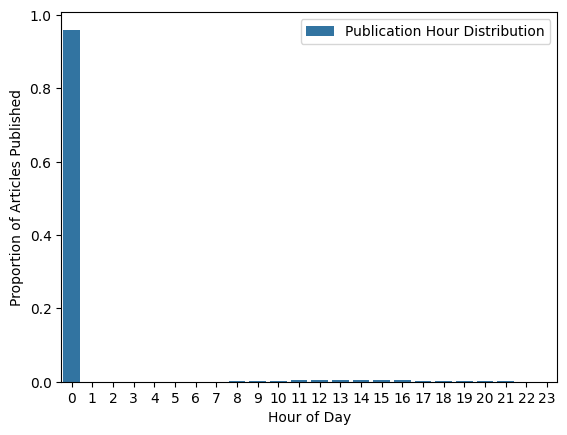

In [10]:
news_df['date'] = pd.to_datetime(news_df['date'], utc=True, format='mixed')
import seaborn as sns
sns.barplot(x=news_df['date'].dt.hour.value_counts().index, y=news_df['date'].dt.hour.value_counts(normalize=True).values,label='Publication Hour Distribution').set(xlabel='Hour of Day', ylabel='Proportion of Articles Published')


C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\2058224940.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ).set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], xlabel='Day of Week', ylabel='Proportion of Articles Published')


[[Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')],
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Proportion of Articles Published')]

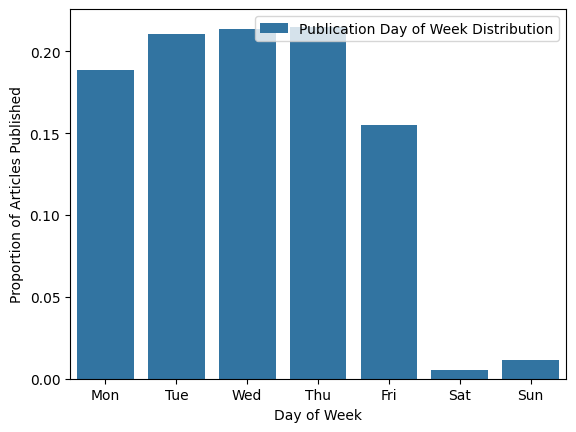

In [11]:
# chnage the x label to day of week
sns.barplot(x=news_df['date'].dt.dayofweek.value_counts().index, y=news_df['date'].dt.dayofweek.value_counts(normalize=True).values,label='Publication Day of Week Distribution', 
        ).set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], xlabel='Day of Week', ylabel='Proportion of Articles Published')

C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\2225009569.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=news_df['date'].dt.month.value_counts().index, y=news_df['date'].dt.month.value_counts(normalize=True).values,label='Publication Month Distribution').set(xlabel='Month', ylabel='Proportion of Articles Published',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Proportion of Articles Published'),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')]]

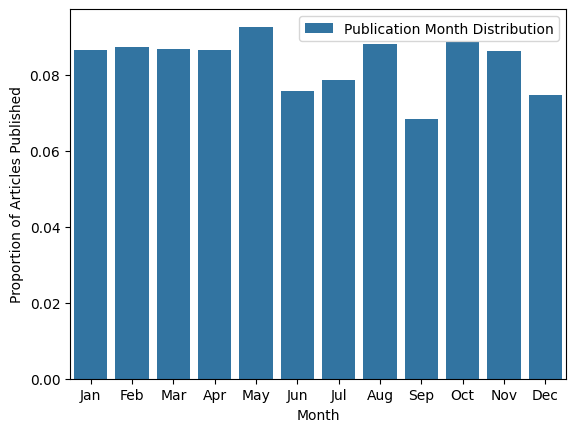

In [12]:
sns.barplot(x=news_df['date'].dt.month.value_counts().index, y=news_df['date'].dt.month.value_counts(normalize=True).values,label='Publication Month Distribution').set(xlabel='Month', ylabel='Proportion of Articles Published',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


Start Date:  2009-02-14 00:00:00+00:00
End Date:  2020-06-11 21:12:35+00:00


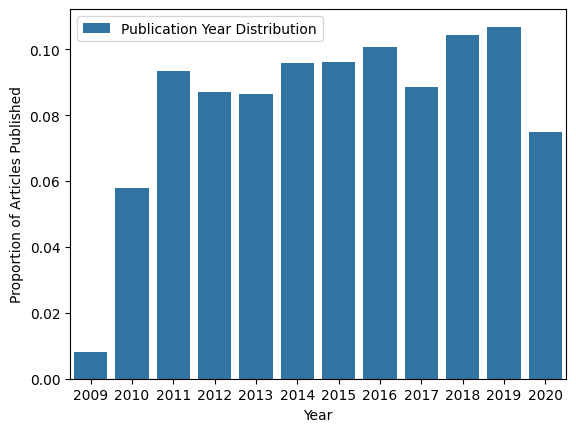

In [13]:
sns.barplot(x=news_df['date'].dt.year.value_counts().index, y=news_df['date'].dt.year.value_counts(normalize=True).values,label='Publication Year Distribution').set(xlabel='Year', ylabel='Proportion of Articles Published')
#show the start date and end date
print("Start Date: ", news_df['date'].min())
print("End Date: ", news_df['date'].max())

## Text Analysis

In [14]:
import nltk
nltk.download([
    "vader_lexicon",
    "stopwords",
     "punkt_tab"
    
])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
import string

stop_words = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)
def get_tokens(headline: str):
    '''
    A function that will return a list of token/strings obtained from a headline. It only return words that aren't stop words and aren't punctuations.

    Args:
        - headline(str): the headline data to be tokenized
    Returns:
        - List[str]: the list of tokens of the headline passed to the function 
    '''
    headline = headline.lower()
    tokens = nltk.word_tokenize(headline)
    result = [token.strip() for token in tokens if token.strip() not in stop_words and token.strip() not in punctuation and token.isalpha()]
    # trigrams = list(nltk.ngrams(result, 3))
    return result

In [16]:
from collections import Counter
import pandas as pd


words_df = pd.DataFrame()
words_df = news_df["headline"].apply(get_tokens)
print(words_df.head())
# Flatten the list of tokenized words
all_words = [word for tokens in words_df for word in tokens]
# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common()

0                         [stocks, hit, highs, friday]
1                      [stocks, hit, highs, wednesday]
2                            [biggest, movers, friday]
3                    [stocks, moving, friday, session]
4    [b, securities, maintains, neutral, agilent, t...
Name: headline, dtype: object


In [17]:
most_common_words[:50]

[('stocks', 161702),
 ('vs', 138835),
 ('eps', 128801),
 ('est', 122289),
 ('shares', 114140),
 ('reports', 108688),
 ('update', 91645),
 ('market', 91080),
 ('earnings', 87183),
 ('sales', 79528),
 ('top', 78493),
 ('benzinga', 74466),
 ('pt', 73059),
 ('announces', 66531),
 ('price', 64217),
 ('buy', 63928),
 ('downgrades', 61942),
 ('trading', 61146),
 ('raises', 57793),
 ('upgrades', 56802),
 ('target', 54669),
 ('maintains', 52960),
 ('higher', 48150),
 ('new', 47875),
 ('session', 45333),
 ('says', 43123),
 ('moving', 42248),
 ('stock', 39334),
 ('sees', 37971),
 ('estimate', 37938),
 ('energy', 35604),
 ('initiates', 34981),
 ('us', 34970),
 ('companies', 34390),
 ('neutral', 34352),
 ('lower', 34184),
 ('bank', 34058),
 ('lowers', 33855),
 ('scheduled', 32835),
 ('coverage', 32323),
 ('company', 31012),
 ('morgan', 30970),
 ('biggest', 30801),
 ('markets', 29783),
 ('capital', 29648),
 ('etfs', 29214),
 ('revenue', 28593),
 ('watch', 28378),
 ('yesterday', 28169),
 ('may', 2809

In [18]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

def get_trigrams(headlines: list, freq_filter=20, top_n=50):
    '''
    A function that uses TrigramCollocationFinder to find significant trigrams from a list of tokenized headlines.

    Args:
        - headlines (list): A list of tokenized headlines (list of lists of words).
        - freq_filter (int): Minimum frequency for a trigram to be considered.
        - top_n (int): Number of top trigrams to return based on PMI.

    Returns:
        - List[Tuple[str, str, str]]: The top significant trigrams.
    '''
    # Flatten all tokenized words into a single list
    all_words = [word for tokens in headlines for word in tokens]
    
    # Create a TrigramCollocationFinder
    finder = TrigramCollocationFinder.from_words(all_words)
    
    # Apply frequency filter to remove rare trigrams
    finder.apply_freq_filter(freq_filter)
    
    # Get the top N trigrams based on Pointwise Mutual Information (PMI)
    significant_trigrams = finder.nbest(TrigramAssocMeasures.pmi, top_n)
    
    return significant_trigrams

In [19]:
# Tokenize the headlines
tokenized_headlines = news_df["headline"].apply(get_tokens)

# Get significant trigrams
significant_trigrams = get_trigrams(tokenized_headlines.tolist(), freq_filter=2, top_n=50)

In [20]:
print(significant_trigrams)

[('alvesco', 'omnaris', 'zetonna'), ('chauvel', 'descalso', 'minoletti'), ('dbap', 'dbeu', 'dbuk'), ('dcar', 'tblt', 'cemi'), ('ewri', 'ewrs', 'ewrm'), ('ewrm', 'ewef', 'ewem'), ('ewrs', 'ewrm', 'ewef'), ('jagx', 'innt', 'jnp'), ('joannlublin', 'dawnmlim', 'davecbenoit'), ('mississippiago', 'txag', 'utahag'), ('moll', 'nemoy', 'talevich'), ('provames', 'speciafoldine', 'tredemine'), ('surgestone', 'provames', 'speciafoldine'), ('wrtc', 'ifmk', 'snoa'), ('alejandro', 'gaviria', 'uribe'), ('barrow', 'hanley', 'mewhinney'), ('evbg', 'psn', 'prpl'), ('miliefsky', 'vinny', 'troia'), ('ménage', 'à', 'trois'), ('pigmented', 'villonodular', 'synovitis'), ('rovral', 'sportak', 'fungicides'), ('arpi', 'sby', 'amh'), ('bronchodilator', 'utibron', 'neohaler'), ('lips', 'perioral', 'rhytids'), ('pignatelli', 'moll', 'nemoy'), ('eeny', 'meeny', 'miny'), ('guri', 'gurx', 'qinc'), ('gurx', 'qinc', 'airr'), ('marlon', 'weems', 'hillcrest'), ('paulino', 'rego', 'barros'), ('steglatro', 'steglujan', 'seg

## Time Series Analysis

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [80]:
# count the daily headlines
daily_headlines =news_df['date'].dt.day_of_week.value_counts().sort_index()
time_series_data_daily = pd.DataFrame({'day': daily_headlines.index , 'publications' : daily_headlines.values})
time_series_data_daily.set_index('day', inplace=True)

monthly_headlines = news_df["date"].dt.month.value_counts().sort_index()
time_series_data_monthly = pd.DataFrame({'month' : monthly_headlines.index , 'publications' : monthly_headlines.values})
time_series_data_monthly.set_index('month', inplace=True)

yearly_headlines = news_df["date"].dt.year.value_counts().sort_index()
time_series_data_yearly = pd.DataFrame({'year' : yearly_headlines.index , 'publications' : yearly_headlines.values})
time_series_data_yearly.set_index('year', inplace=True)

In [79]:
montly_decomp= seasonal_decompose(time_series_data_monthly['publications'], model='additive', period=1)
daily_decomp= seasonal_decompose(time_series_data_daily['publications'], model='additive', period=1)
yearly_decomp= seasonal_decompose(time_series_data_yearly['publications'], model='additive', period=1)

<Axes: xlabel='year', ylabel='resid'>

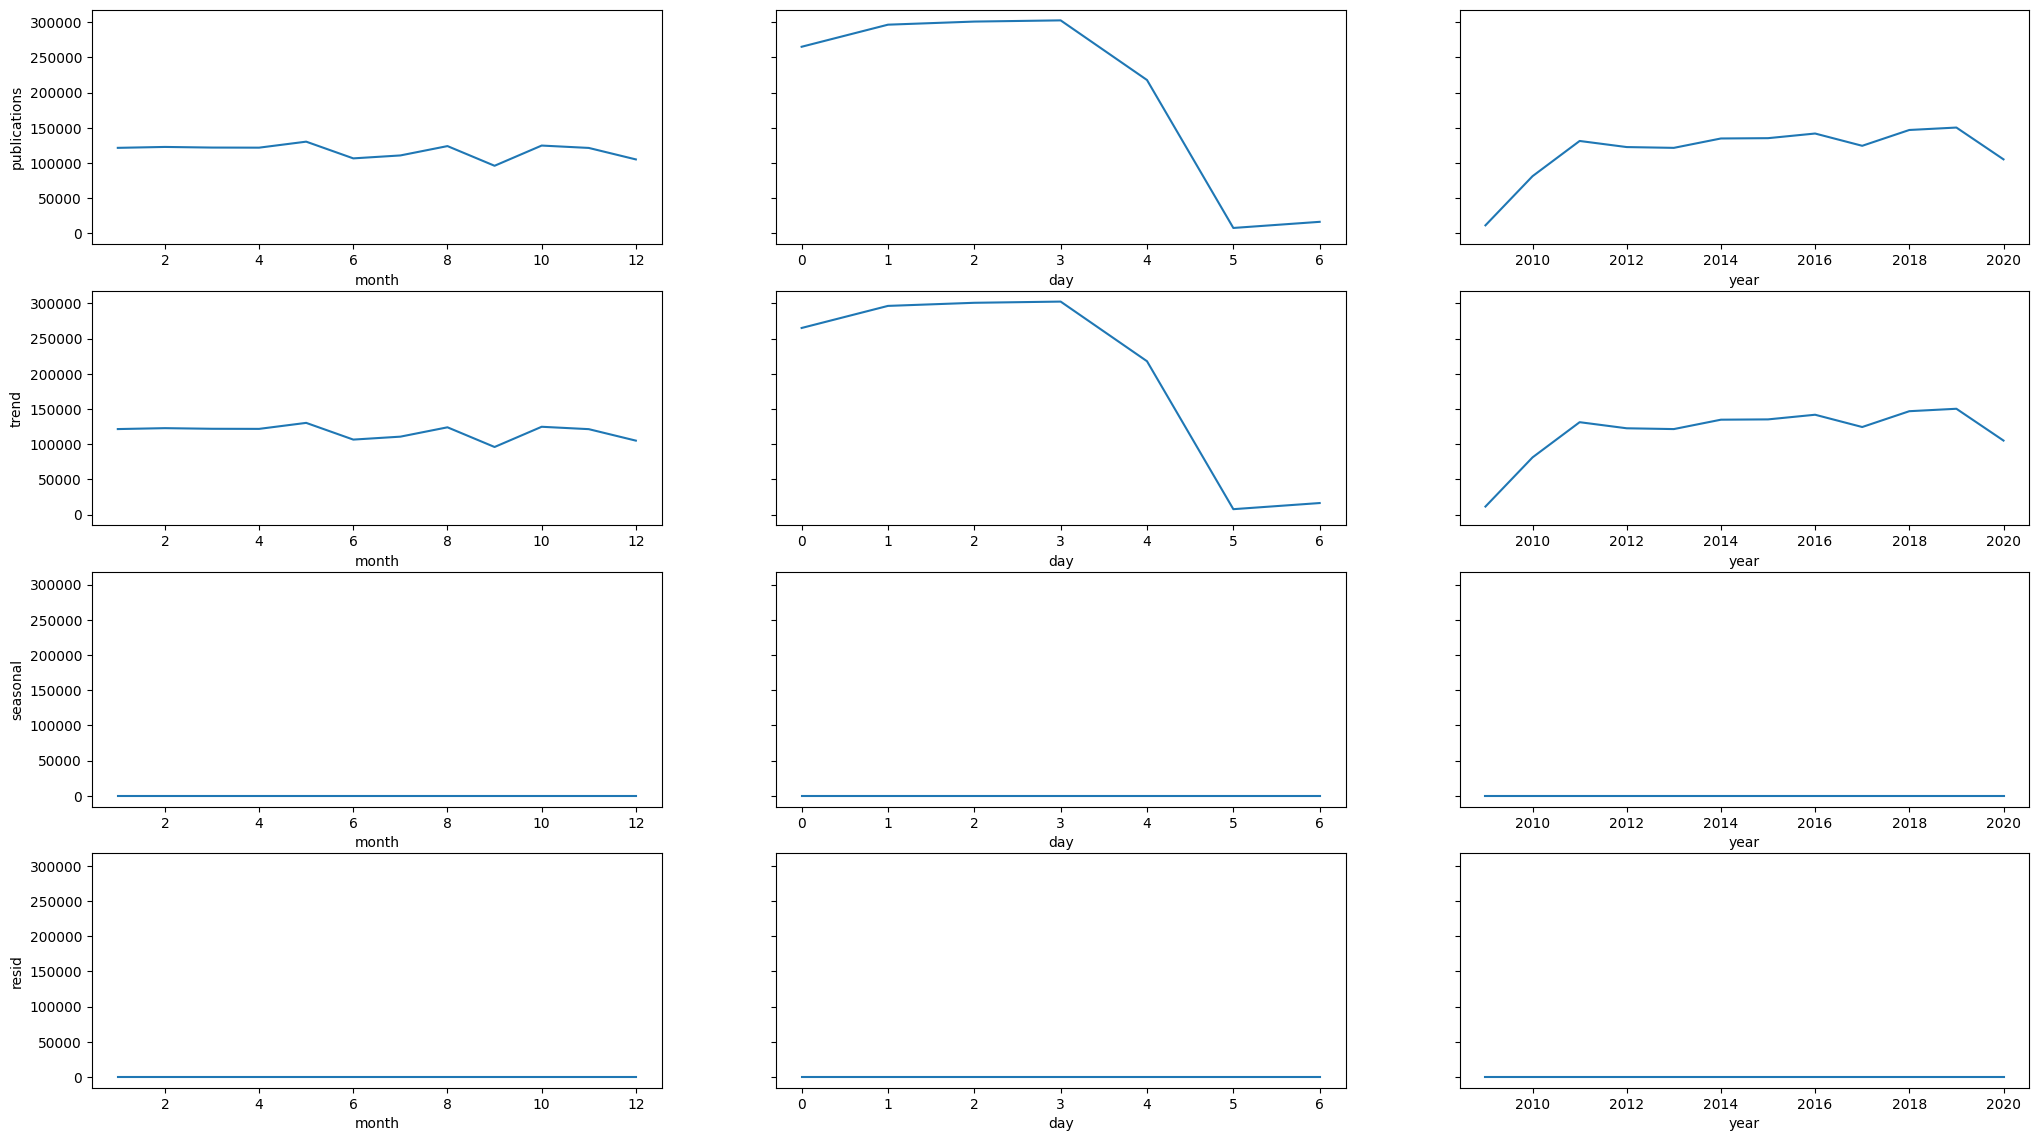

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(25,14) , sharex=False, sharey=True)
sns.lineplot(data=time_series_data_monthly, x="month" , y="publications", ax=ax[0][0])# this plots the original value
sns.lineplot(data=montly_decomp.trend , ax=ax[1][0]) # this plots the trend
sns.lineplot(data=montly_decomp.seasonal , ax=ax[2][0]) # this plots the seasonal paterns
sns.lineplot(data=montly_decomp.resid , ax=ax[3][0]) #

sns.lineplot(data=time_series_data_daily, x="day" , y="publications", ax=ax[0][1]) # this plots the original value
sns.lineplot(data=daily_decomp.trend.dropna(), ax=ax[1][1]) # this plots the trend
sns.lineplot(data=daily_decomp.seasonal.dropna() , ax=ax[2][1]) # this plots the seasonal paterns
sns.lineplot(data=daily_decomp.resid.dropna() , ax=ax[3][1]) #

sns.lineplot(data=time_series_data_yearly, x="year" , y="publications", ax=ax[0][2]) # this plots the original value
sns.lineplot(data=yearly_decomp.trend , ax=ax[1][2]) # this plots the trend
sns.lineplot(data=yearly_decomp.seasonal , ax=ax[2][2]) # this plots the seasonal paterns
sns.lineplot(data=yearly_decomp.resid , ax=ax[3][2])

### For days :
### We have a trend where publication will be constantly outputed for the week-days and then there will be a sharp down trend during the weekends
### There is no seasonality in our data, when broke down by days of the week
### Our resid is 0 , so it means that there are no inexplainable paterns the decompositions missed

### For months :
### There is no seasonality in our data, when broke down by months of the year
### Our residual is 0 , so it means that there are no inexplainable paterns the decompositions missed
### There is a constant trend of publication between January and April , there is a very strong downward trend from August to September

### For years :
### There is no seasonality in our data, when broke down by year
### from 2009 mid to  20111 there is a sharp increase in publications

## Publisher Analysis

In [105]:
#doing this again it has been done above in descriptive statistics
publisher_grouping = news_df.groupby('publisher').count().sort_values(by='headline' , ascending=False)
publisher_grouping[['headline']].head(20)

,headline
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\1922707617.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


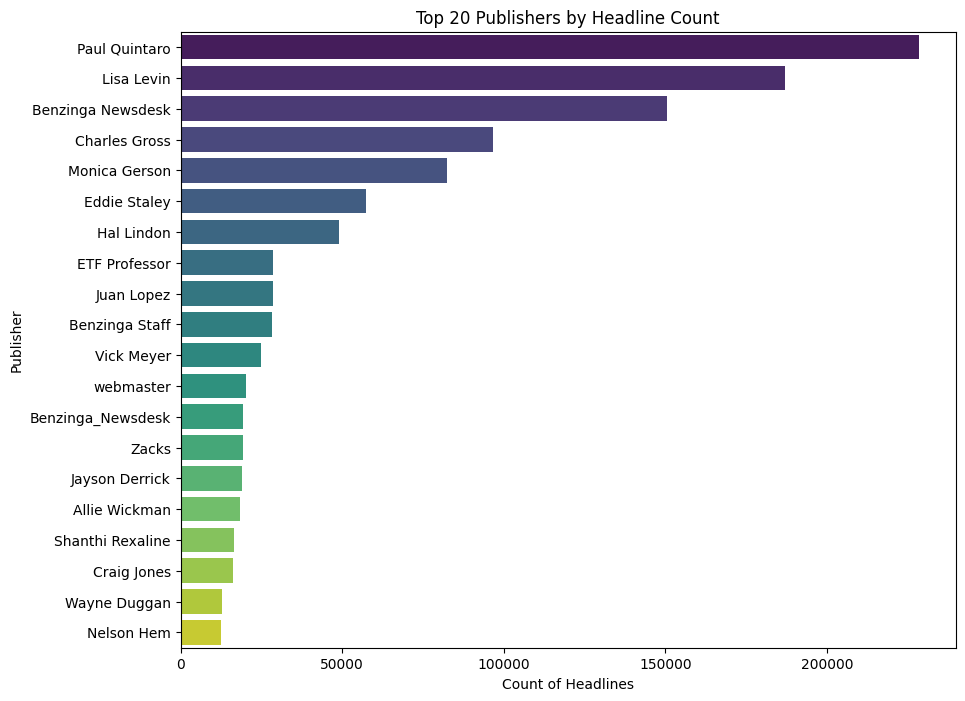

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 20 publishers by headline count
top_publishers = publisher_grouping[['headline']].head(20)

# Reset index for plotting
# top_publishers = top_publishers.reset_index()

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_publishers,
    x='headline',
    y='publisher',
    palette='viridis'
)

# Add labels and title
plt.xlabel('Count of Headlines')
plt.ylabel('Publisher')
plt.title('Top 20 Publishers by Headline Count')
plt.show()

### find organizations that publish the most articles

In [ ]:
news_df["publisher"].map(lambda publisher : "@" in publisher).value_counts()


publisher
False    1399240
True        8088
Name: count, dtype: int64

In [114]:
#find all publishers that have "@" in their name
email_publishers =  news_df[news_df["publisher"].str.contains("@")]
#find all publishers that have "@" in their name
def obtain_organization(email: str):
    '''
    A function that returns the organization/domain name of a given email.

    Args:
        - email(str): the email whose organization/domain we want to obtain
    
    Return:
        - string: the organization name
    '''

    # split on the @ sign and get the right most value
    right = email.split("@")[1]
    # split with . and get the left most value
    name = right.split(".")[0]

    return name
email_publishers["organization"] = email_publishers["publisher"].apply(obtain_organization)


C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\1957967172.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers["organization"] = email_publishers["publisher"].apply(obtain_organization)


In [115]:
email_publishers["organization"].value_counts()

organization
benzinga              7937
gmail                  139
andyswan                 5
investdiva               2
tothetick                2
eosdetroit               1
forextraininggroup       1
stockmetrix              1
Name: count, dtype: int64

C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\4252265924.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


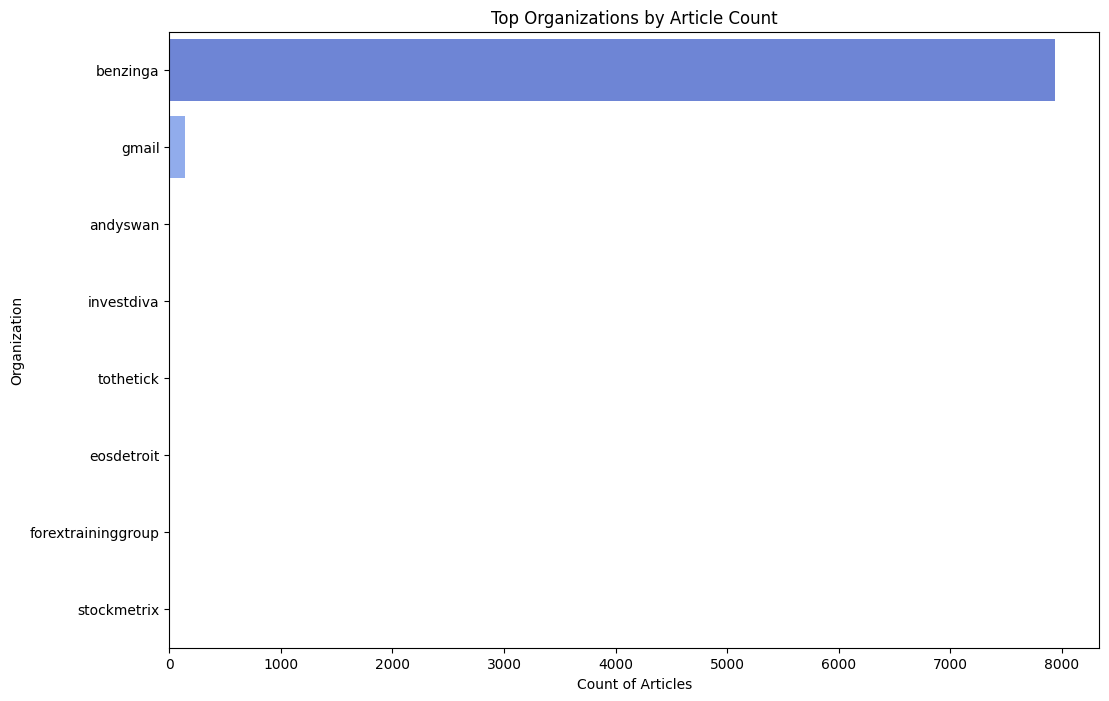

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the organization counts
organization_counts = email_publishers["organization"].value_counts()

# Reset index for plotting
organization_counts = organization_counts.reset_index()
organization_counts.columns = ["organization", "count"]

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=organization_counts,
    x="count",
    y="organization",
    palette="coolwarm",
)

# Add labels and title
plt.xlabel("Count of Articles")
plt.ylabel("Organization")
plt.title("Top Organizations by Article Count")
plt.show()

## Sentiment Analysis to find out the type of artciles being published

In [119]:
nltk.download([
    "vader_lexicon",
    "punkt_tab",
    "stopwords",
    "averaged_perceptron_tagger"
])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yeget\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [123]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()
news_df['headline_sentiment'] = news_df['headline'].apply(lambda headline: sentiment_analyzer.polarity_scores(headline)["compound"])

### Now let us classify those sentiments as very-positive, positive, neutral, negative and very-negavtive.
### The ranges I chose for the different classifications are as follows:

### very-positive: 0.7 - 1
### positive: 0.1 - 0.7
### neutral: -0.1 - 0.1
### negative: -0.7 - -0.1
### very-negative: -1 - -0.7

In [132]:
news_df['sentiment_category'] = pd.cut(x=news_df['headline_sentiment'] , bins=[-1, -0.7, -0.1, 0.1, 0.7, 1] , labels=["very-negative", "negative", "neutral", "positive", "very-positive"], precision=3)

## let's plot the distribution of sentiment categories in the dataset

C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\3701039345.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


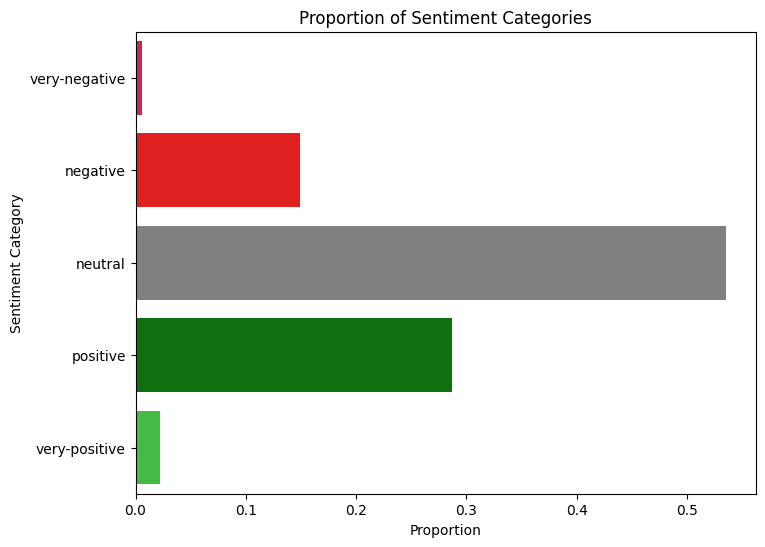

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of each sentiment category
sentiment_proportions = news_df['sentiment_category'].value_counts(normalize=True).reset_index()
sentiment_proportions.columns = ['sentiment_category', 'proportion']

# Define custom colors for the sentiment categories
custom_palette = {
    "positive": "green",
    "very-positive": "limegreen",
    "negative": "red",
    "very-negative": "crimson",
    "neutral": "grey"
}

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=sentiment_proportions,
    x='proportion',
    y='sentiment_category',
    palette=custom_palette
)

# Add labels and title
plt.xlabel('Proportion')
plt.ylabel('Sentiment Category')
plt.title('Proportion of Sentiment Categories')
plt.show()

C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\2452623738.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  news_df['sentiment_group'] = news_df['sentiment_category'].replace({
C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\2452623738.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  publisher_sentiment = top_publishers_df.groupby(['publisher', 'sentiment_group']).size().reset_index(name='count')
C:\Users\yeget\AppData\Local\Temp\ipykernel_27132\2452623738.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pand

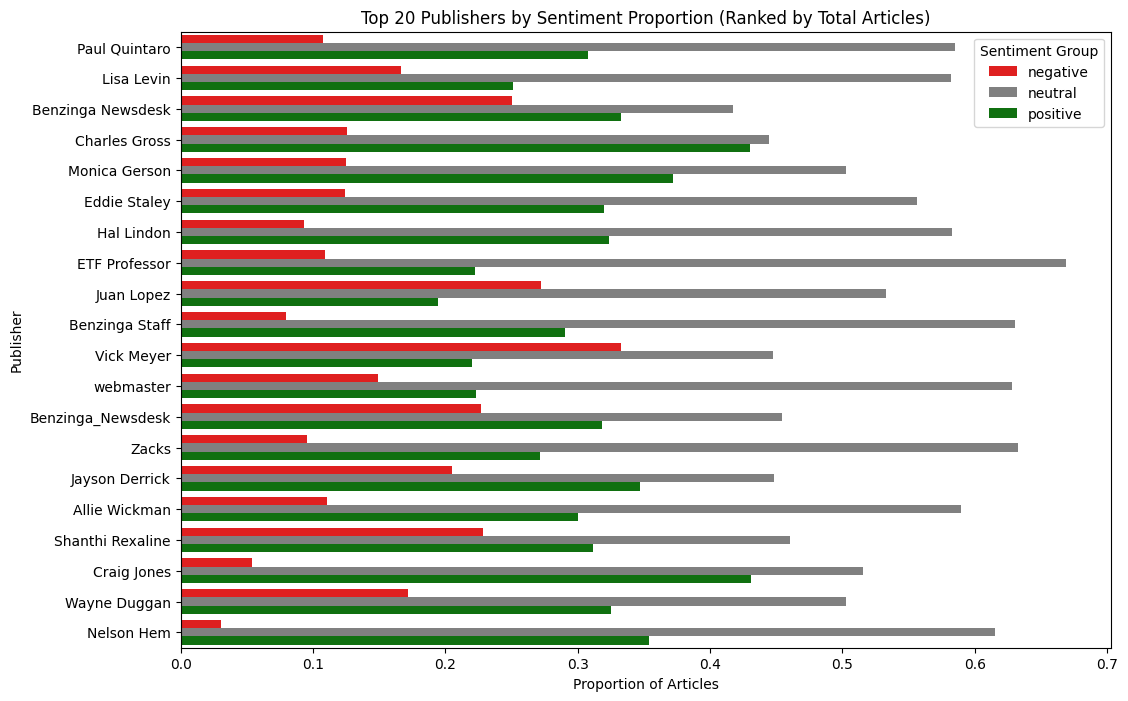

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine positive and very-positive, negative and very-negative
news_df['sentiment_group'] = news_df['sentiment_category'].replace({
    'very-positive': 'positive',
    'very-negative': 'negative'
})

# Get the top 20 publishers by total headline count
top_publishers = news_df['publisher'].value_counts().head(20).index

# Filter the dataset for top publishers
top_publishers_df = news_df[news_df['publisher'].isin(top_publishers)]

# Group by publisher and sentiment group
publisher_sentiment = top_publishers_df.groupby(['publisher', 'sentiment_group']).size().reset_index(name='count')

# Calculate total articles per publisher for sorting
publisher_totals = top_publishers_df['publisher'].value_counts().reset_index()
publisher_totals.columns = ['publisher', 'total_count']

# Merge total counts for sorting
publisher_sentiment = publisher_sentiment.merge(publisher_totals, on='publisher')

# Normalize the counts within each publisher
publisher_sentiment['proportion'] = publisher_sentiment.groupby('publisher')['count'].transform(lambda x: x / x.sum())

# Sort by total articles published
publisher_sentiment = publisher_sentiment.sort_values(by='total_count', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=publisher_sentiment,
    x='proportion',
    y='publisher',
    hue='sentiment_group',
    palette={'positive': 'green', 'neutral': 'grey', 'negative': 'red'}
)

# Add labels and title
plt.xlabel('Proportion of Articles')
plt.ylabel('Publisher')
plt.title('Top 20 Publishers by Sentiment Proportion (Ranked by Total Articles)')
plt.legend(title='Sentiment Group')
plt.show()